### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

### Load the data

In [2]:
df = pd.read_csv('Position_Salaries.csv')

### Data Understanding

In [3]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
df.shape

(10, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [6]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [7]:
df.corr(method='pearson')

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [8]:
df.skew()

Level     0.000000
Salary    2.104605
dtype: float64

### Visualization

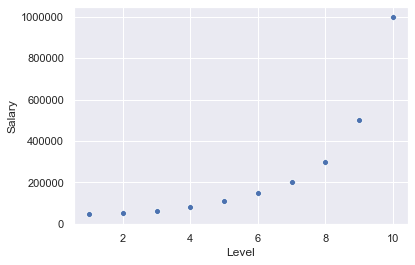

In [9]:
sns.scatterplot(x='Level', y='Salary', data=df)

### Define independent and dependent variables

In [10]:
X = df['Level']
y = df['Salary']

In [11]:
X.shape

(10,)

In [12]:
X = X.values.reshape(-1,1)
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

### Fitting Linear Regression Model

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
lin = lin_reg.predict(X)

#### Visualising the linear regression result

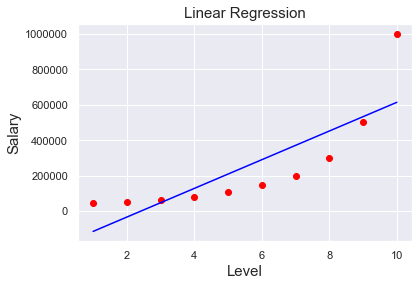

In [15]:
plt.scatter(X, y, color='red')
plt.plot(X, lin, color='blue')
plt.title('Linear Regression', fontsize=15)
plt.xlabel('Level', fontsize=15)
plt.ylabel('Salary', fontsize=15)
plt.show()

### Fitting Polynomial Regression Model

### Polynomial with degree=2

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

X_poly = poly_reg.fit_transform(X)

poly_reg.fit(X_poly, y)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
pd.DataFrame(X_poly).head()

,0,1,2
0,1.0,1.0,1.0
1,1.0,2.0,4.0
2,1.0,3.0,9.0
3,1.0,4.0,16.0
4,1.0,5.0,25.0


#### Visualising the polynomial regression result (degree=2)

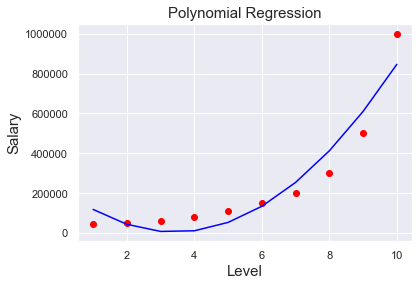

In [18]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Polynomial Regression', fontsize=15)
plt.xlabel('Level', fontsize=15)
plt.ylabel('Salary', fontsize=15)
plt.show()

### Polynomial with degree=3

In [19]:
poly_reg = PolynomialFeatures(degree=3)

X_poly = poly_reg.fit_transform(X)

poly_reg.fit(X_poly, y)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Visualising the polynomial regression result (degree=3)

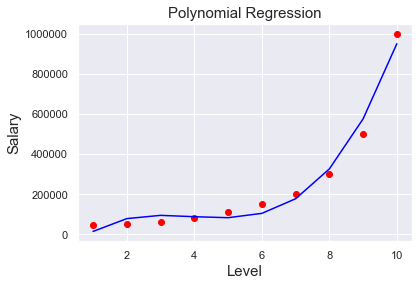

In [20]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Polynomial Regression', fontsize=15)
plt.xlabel('Level', fontsize=15)
plt.ylabel('Salary', fontsize=15)
plt.show()

### Polynomial with degree=4

In [21]:
poly_reg = PolynomialFeatures(degree=4)

X_poly = poly_reg.fit_transform(X)

poly_reg.fit(X_poly, y)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)
poly = lin_reg2.predict(X_poly)

#### Visualising the polynomial regression result (degree=4)

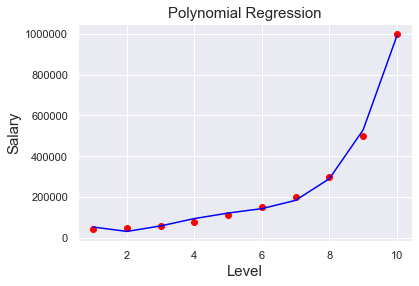

In [22]:
# Visualising the polynomial regression result (degree=4)
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Polynomial Regression', fontsize=15)
plt.xlabel('Level', fontsize=15)
plt.ylabel('Salary', fontsize=15)
plt.show()

#### Visualising the Polynomial Regression results (for higher resolution and smoother curve with degree=4)

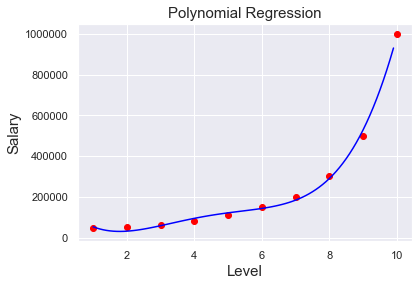

In [23]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Polynomial Regression', fontsize=15)
plt.xlabel('Level', fontsize=15)
plt.ylabel('Salary', fontsize=15)
plt.show()

### Predicting a new result with Linear Regression

In [24]:
lin_reg.predict([[6.5]])

array([330378.78787879])

### Predicting a new result with Polynomial Regression

In [25]:
lin_reg2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.4526516])